In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

# Basics

In [3]:
df = pd.read_csv('Market_Risk_Data_coded.csv')

In [4]:
df.head()

,Date,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,28-03-2016,217,316,386,114,173
1,04-04-2016,218,302,386,121,171
2,11-04-2016,215,308,374,120,171
3,18-04-2016,223,320,408,122,172
4,25-04-2016,214,319,418,122,175


In [5]:
df.shape

(418, 6)

In [6]:
df.describe().round()

,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
count,418.0,418.0,418.0,418.0,418.0
mean,279.0,528.0,369.0,277.0,124.0
std,75.0,227.0,182.0,156.0,130.0
min,156.0,261.0,65.0,110.0,11.0
25%,224.0,334.0,186.0,166.0,16.0
50%,266.0,478.0,400.0,213.0,30.0
75%,304.0,707.0,466.0,360.0,250.0
max,493.0,1236.0,1035.0,928.0,397.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           418 non-null    object
 1   ITC Limited    418 non-null    int64 
 2   Bharti Airtel  418 non-null    int64 
 3   Tata Motors    418 non-null    int64 
 4   DLF Limited    418 non-null    int64 
 5   Yes Bank       418 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.7+ KB


### Converting Date column to datetime

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

# Plots

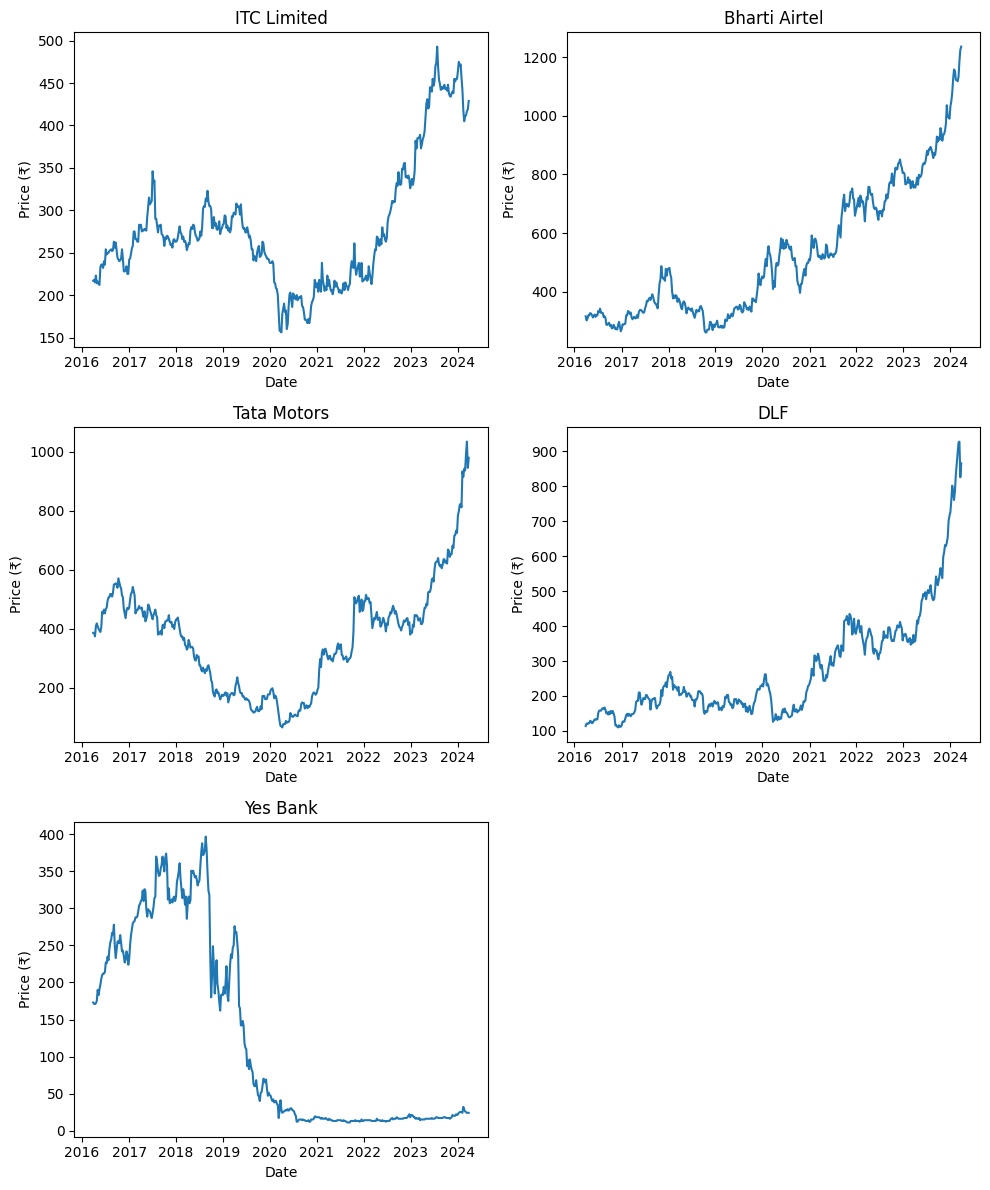

In [10]:
plt.figure(figsize=(10,12))

plt.subplot(321)
sns.lineplot(x=df['Date'], y=df['ITC Limited']);
plt.title('ITC Limited')
plt.ylabel('Price (₹)');

plt.subplot(322)
sns.lineplot(x=df['Date'], y=df['Bharti Airtel']);
plt.title('Bharti Airtel')
plt.ylabel('Price (₹)');

plt.subplot(323)
sns.lineplot(x=df['Date'], y=df['Tata Motors']);
plt.title('Tata Motors')
plt.ylabel('Price (₹)');

plt.subplot(324)
sns.lineplot(x=df['Date'], y=df['DLF Limited']);
plt.title('DLF')
plt.ylabel('Price (₹)');

plt.subplot(325)
sns.lineplot(x=df['Date'], y=df['Yes Bank']);
plt.title('Yes Bank')
plt.ylabel('Price (₹)');

plt.tight_layout()

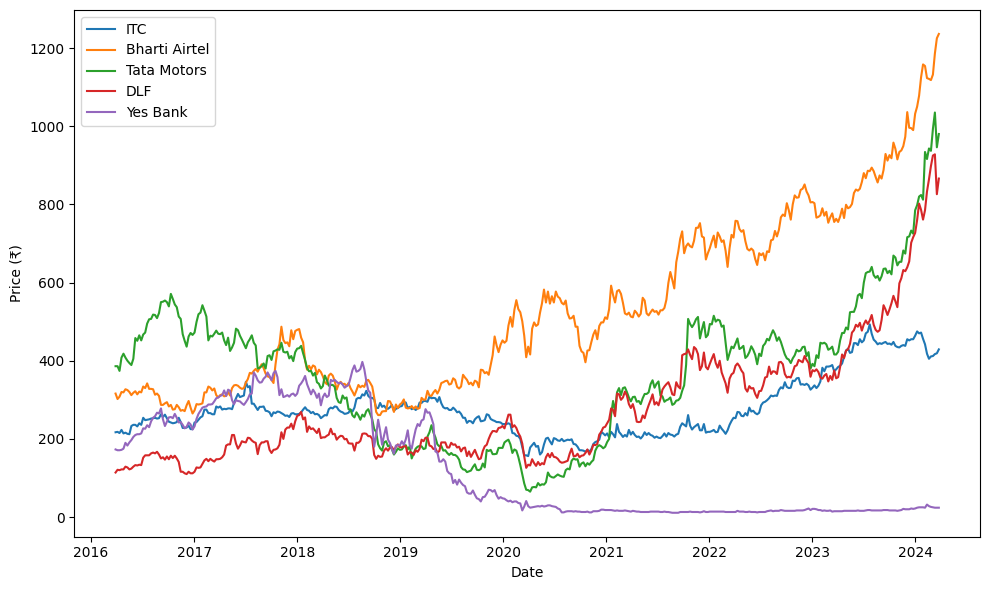

In [21]:
plt.figure(figsize=(10,6))


sns.lineplot(x=df['Date'], y=df['ITC Limited'], label='ITC');
sns.lineplot(x=df['Date'], y=df['Bharti Airtel'], label='Bharti Airtel');
sns.lineplot(x=df['Date'], y=df['Tata Motors'], label='Tata Motors');
sns.lineplot(x=df['Date'], y=df['DLF Limited'], label='DLF');
sns.lineplot(x=df['Date'], y=df['Yes Bank'], label='Yes Bank');
plt.ylabel('Price (₹)');

plt.legend()
plt.tight_layout()

#  Analyzing Returns

In [12]:
log_all = np.log(df.drop('Date', axis=1))

In [13]:
all_returns = log_all.diff()

In [14]:
all_returns.shape

(418, 5)

In [15]:
all_returns.head()

,ITC Limited,Bharti Airtel,Tata Motors,DLF Limited,Yes Bank
0,NaN,NaN,NaN,NaN,NaN
1,0.004598,-0.045315,0.000000,0.059592,-0.011628
2,-0.013857,0.019673,-0.031582,-0.008299,0.000000
3,0.036534,0.038221,0.087011,0.016529,0.005831
4,-0.041196,-0.003130,0.024214,0.000000,0.017291


In [16]:
means = all_returns.mean()
means

ITC Limited      0.001634
Bharti Airtel    0.003271
Tata Motors      0.002234
DLF Limited      0.004863
Yes Bank        -0.004737
dtype: float64

In [17]:
std = all_returns.std()
std

ITC Limited      0.035904
Bharti Airtel    0.038728
Tata Motors      0.060484
DLF Limited      0.057785
Yes Bank         0.093879
dtype: float64

In [18]:
df_vol = pd.DataFrame({'Average (log)': means, 'Volatility (log)': std})
df_vol

,Average (log),Volatility (log)
ITC Limited,0.001634,0.035904
Bharti Airtel,0.003271,0.038728
Tata Motors,0.002234,0.060484
DLF Limited,0.004863,0.057785
Yes Bank,-0.004737,0.093879


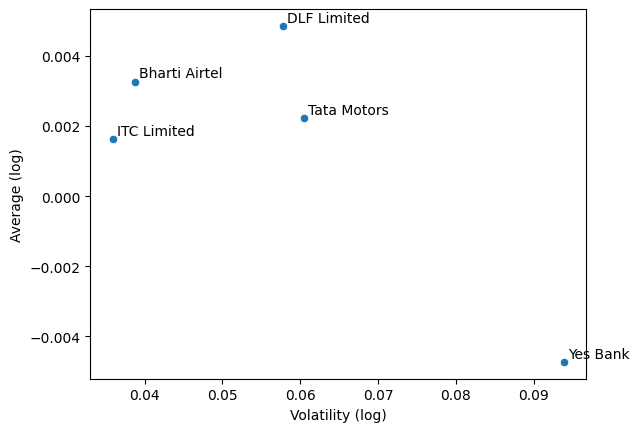

In [24]:
sns.scatterplot(x=df_vol['Volatility (log)'], y=df_vol['Average (log)']);
for i in range(df_vol.shape[0]):
    plt.annotate(df_vol.index[i], (df_vol['Volatility (log)'][i], df_vol['Average (log)'][i]), \
                 textcoords='offset points', xytext=(3,3))

plt.show()

## Sensex values

In [43]:
sensex = pd.read_csv('BSE Sensex 30 Historical Data.csv')

In [44]:
sensex.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,05-09-2024,"82,191.84","82,469.79","82,565.44","82,158.74",5.82M,-0.20%
1,04-09-2024,"82,352.64","81,845.50","82,408.54","81,833.69",9.05M,-0.25%
2,03-09-2024,"82,555.44","82,652.69","82,675.06","82,400.76",4.32M,-0.01%
3,02-09-2024,"82,559.84","82,725.28","82,725.28","82,440.93",9.50M,0.24%
4,30-08-2024,"82,365.77","82,637.03","82,637.03","82,256.02",10.31M,0.28%


In [45]:
sensex.columns = sensex.columns.str.replace('Change %', 'Change')

In [46]:
sensex['Change'] = sensex['Change'].str.replace('%', '')

In [47]:
sensex.head()

,Date,Price,Open,High,Low,Vol.,Change
0,05-09-2024,"82,191.84","82,469.79","82,565.44","82,158.74",5.82M,-0.20
1,04-09-2024,"82,352.64","81,845.50","82,408.54","81,833.69",9.05M,-0.25
2,03-09-2024,"82,555.44","82,652.69","82,675.06","82,400.76",4.32M,-0.01
3,02-09-2024,"82,559.84","82,725.28","82,725.28","82,440.93",9.50M,0.24
4,30-08-2024,"82,365.77","82,637.03","82,637.03","82,256.02",10.31M,0.28


In [48]:
sensex['Change'] = sensex['Change'].astype('float')

In [49]:
sensex_return = sensex['Change'].mean()
sensex_volatility = sensex['Change'].std()

In [50]:
print(sensex_return.round(3))
print(sensex_volatility.round(3))

0.059
1.065


## Converting to Percentage

In [25]:
means_percentage = (np.exp(means) - 1) * 100
std_percentage = (np.exp(std) - 1) * 100

In [26]:
df_pct = pd.DataFrame({'Average (%)': means_percentage, 'Volatility (%)': std_percentage})
df_pct

,Average (%),Volatility (%)
ITC Limited,0.163577,3.655608
Bharti Airtel,0.327608,3.948763
Tata Motors,0.223683,6.235108
DLF Limited,0.487440,5.948690
Yes Bank,-0.472558,9.842660


## Plotting Percentage Values

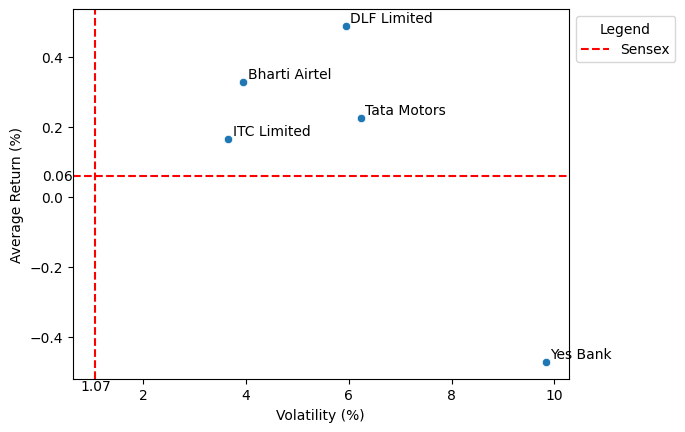

In [36]:
sns.scatterplot(x=df_pct['Volatility (%)'], y=df_pct['Average (%)']);
plt.xlabel('Volatility (%)')
plt.ylabel('Average Return (%)')
plt.axhline(y=sensex_return,linestyle='--', color = "red", label='Sensex')
plt.axvline(x=sensex_volatility,linestyle='--', color = "r")
for i in range(df_pct.shape[0]):
    plt.annotate(df_pct.index[i], (df_pct['Volatility (%)'][i], df_pct['Average (%)'][i]), \
                 textcoords='offset points', xytext=(3,3))
plt.text(plt.gca().get_xlim()[0], sensex_return, f'{sensex_return:.2f}', 
         va='center', ha='right', color='black')
plt.text(sensex_volatility, plt.gca().get_ylim()[0], f'{sensex_volatility:.2f}', 
         va='top', ha='center', color='black')
plt.legend(loc='upper left', bbox_to_anchor=(1,1), title='Legend')
plt.show()